https://link.springer.com/chapter/10.1007/978-3-540-34426-1_9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sode import RungeKutta4
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

100%|##########| 4999/4999 [00:00<00:00, 30103.06it/s]


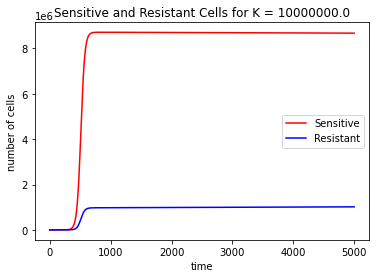

A =  0.03167759119599647
B =  0.03167759150606672
C =  0.03036049959866719
D =  0.03187965232017364
C - A =  0.06203809141480417
D - B =  0.00020206081410691773


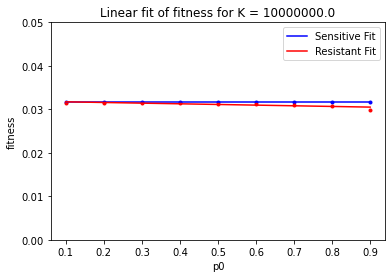

100%|##########| 4999/4999 [00:00<00:00, 31105.52it/s]


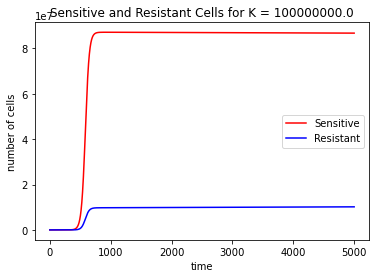

A =  0.03167464396720713
B =  0.03167464399224772
C =  0.030380184094684022
D =  0.03187300775138161
C - A =  0.06205482811197233
D - B =  0.00019836375913389465


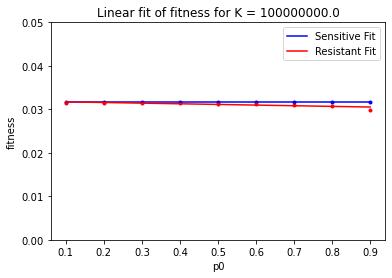

100%|##########| 4999/4999 [00:00<00:00, 29778.44it/s]


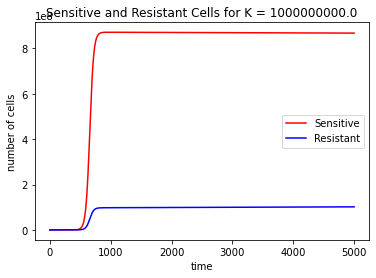

A =  0.03167169666938186
B =  0.03167169666252274
C =  0.030399831131045
D =  0.031866380663600195
C - A =  0.062071527786708616
D - B =  0.0001946840010774581


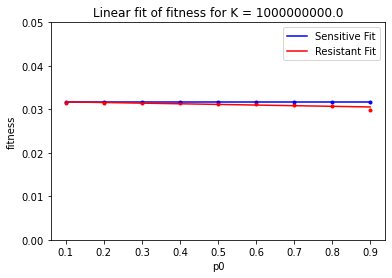

100%|##########| 4999/4999 [00:00<00:00, 25366.88it/s]


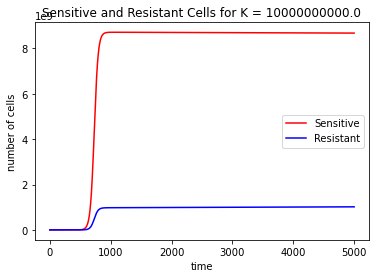

A =  0.031668749319626
B =  0.031668749217506585
C =  0.030419458720410218
D =  0.03185976145684056
C - A =  0.06208820783579738
D - B =  0.0001910122393339736


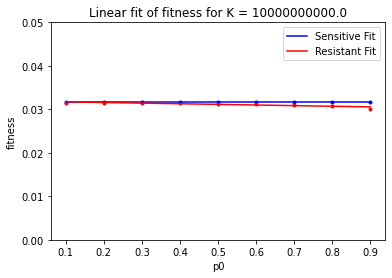

100%|##########| 4999/4999 [00:00<00:00, 27220.57it/s]


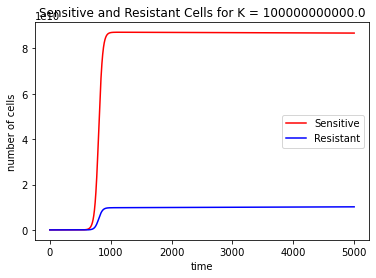

A =  1.3455273241860057
B =  0.21935871533622386
C =  0.3523599411654127
D =  0.9975706195012061
C - A =  -0.5544499523481454
D - B =  0.7782119041649822


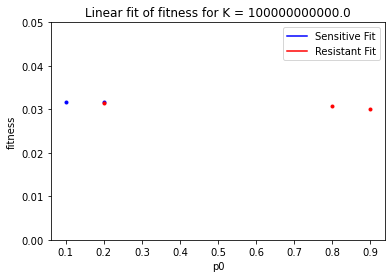

100%|##########| 4999/4999 [00:00<00:00, 30246.19it/s]


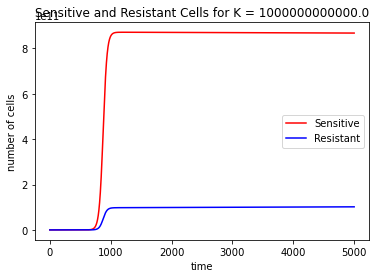

A =  1.051168497349619
B =  0.7286388465460151
C =  0.8088973379184203
D =  0.9703017739749838
C - A =  1.2150065336608316
D - B =  0.24166292742896878


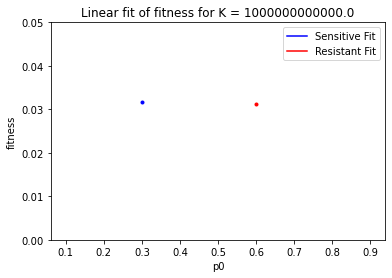



Average R^2 coefficient 0.0


In [13]:
u = 3.4e-05
s = 0.4/100
T = 3
years=30
days = int(np.floor(years/4.))*366+(years-int(np.floor(years/4.)))*365
t_tot = int(days/T)
d = lambda j: (1-s)**(j+1)/2
b = lambda j: 1-d(j)

b1, d1 = 3.25e-2, 1e-3
b2, d2 = 3.25e-2, 1e-3
nu = b1*u
p1 = 100
dm = d1*u**2
p0_grid = np.arange(0.1, 1, 0.1)

def rhs_cc_no_drug(x, t):
    x1, x2 = x
    rhs1 = b1*(1 - (x1 + x2)/k)*x1 - (d1 + nu)*x1
    rhs2 = b2*(1 - (x1+x2)/k)*x2 + nu*x1 - d2*x2
    return np.array([rhs1,rhs2])

def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))

def get_fitness(p0):
    rest = np.arange(0, 5000, 1)
    solver = RungeKutta4(rhs_cc_no_drug)
    init_cond = np.array([p0, 1-p0])
    solver.set_initial_conditions(init_cond)
    resy, rest = solver.solve(rest)
    N_1, N_2 = resy.T
    
    popt1, _ = curve_fit(sigmoid, range(len(N_1)), N_1)
    popt2, _ = curve_fit(sigmoid, range(len(N_2)), N_2)
    return popt1[1], popt2[1], N_1, N_2

colors = ['b', 'r', 'orange', 'y', 'g', 'indigo', 'purple']
# ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
sum    = 0
# plot for different carrying capacities
for i in range(len(ccs)): 
    k = ccs[i]
    k1s, k2s = [], []
    for p0 in p0_grid:
        k1, k2, N_1, N_2 = get_fitness(p0)
        k1s.append(k1); k2s.append(k2)

    plt.xlabel('time')
    plt.ylabel('number of cells')
    plt.title(f'Sensitive and Resistant Cells for K = {ccs[i]}')
    plt.plot(N_1, label='Sensitive', color='red')
    plt.plot(N_2, label='Resistant', color='blue')
    plt.legend(loc='center right')
    plt.show(); plt.clf()
    fit  = np.polyfit(p0_grid, k1s, 1)
    fit2 = np.polyfit(p0_grid, k2s, 1)
    print('A = ', fit[0]+fit[1])
    print('B = ', fit[1])
    print('C = ', fit2[0] + fit2[1])
    print('D = ', fit2[1])
    
    print('C - A = ', fit2[0] + fit2[1] - fit[0]+fit[1])
    print('D - B = ', fit2[1] - fit[1])
    
    plt.plot(p0_grid, k1s, 'k.', color='blue')
    plt.plot(p0_grid, k2s, 'k.', color='red')
    plt.plot(p0_grid, fit[0]*p0_grid + fit[1], linestyle='-', color='blue', label='Sensitive Fit')
    plt.plot(p0_grid, fit2[0]*p0_grid + fit2[1], linestyle='-', color='red', label='Resistant Fit')
    plt.legend(loc='upper right')
    plt.xlabel('p0')
    plt.ylabel('fitness')
    plt.title(f'Linear fit of fitness for K = {ccs[i]}')
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((x1,x2,0, 0.05))
    plt.show()    
    # sum += r2_score(k1s, fit[0]*p0_grid + fit[1])
    # print("R^2 correlation", r2_score(k1s, fit[0]*p0_grid + fit[1]))

print()
print()
print('Average R^2 coefficient', sum / len(ccs))


100%|##########| 4999/4999 [00:00<00:00, 28570.43it/s]


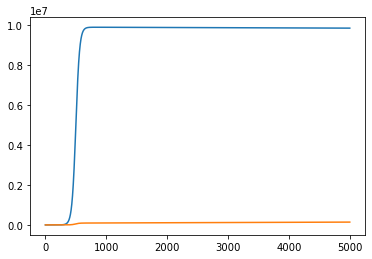

A =  0.03296438265770109
B =  0.03154246099439972
C =  0.01701093466387469
D =  0.03447565350276676
0.8135592514453651


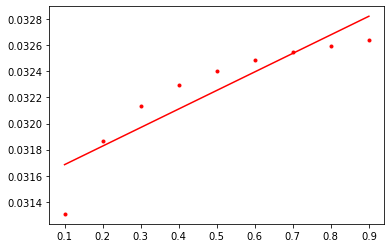

100%|##########| 4999/4999 [00:00<00:00, 25891.50it/s]


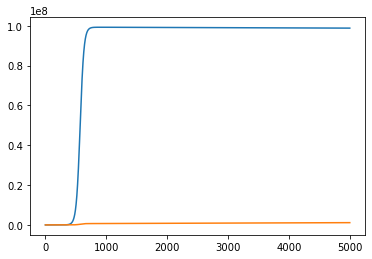

A =  0.0329007552871185
B =  0.031814634367067364
C =  0.01141780475630335
D =  0.03648786145364944
0.7918260280806703


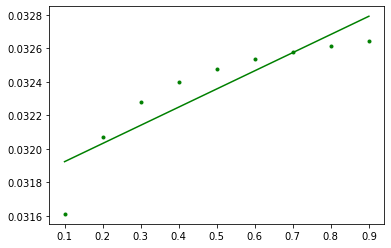

100%|##########| 4999/4999 [00:00<00:00, 26155.28it/s]


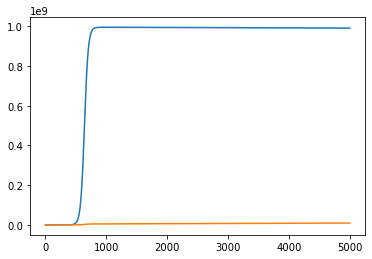

A =  0.03284400401770761
B =  0.03203146642603711
C =  0.007516830230679613
D =  0.037189101210676284
0.7751247723829271


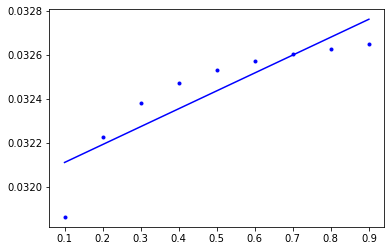

100%|##########| 4999/4999 [00:00<00:00, 27070.75it/s]


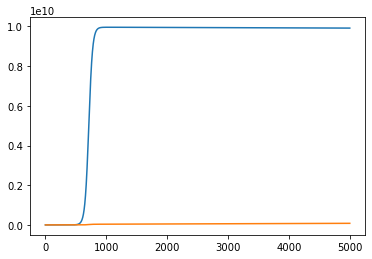

A =  0.8095548484971384
B =  -0.31599296543533156
C =  0.0027852227405159163
D =  0.03767008465049798
0.5253165272677229


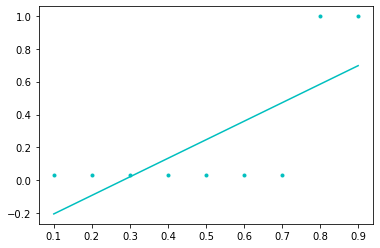

100%|##########| 4999/4999 [00:00<00:00, 26848.45it/s]


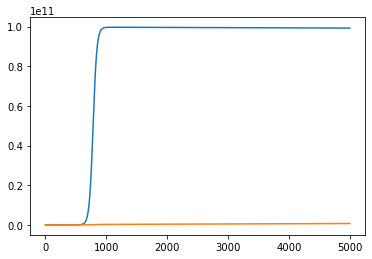

A =  0.9969979159939824
B =  0.9969198252966368
C =  -0.21621356383359763
D =  0.46720381700106545
0.0046543311809761345


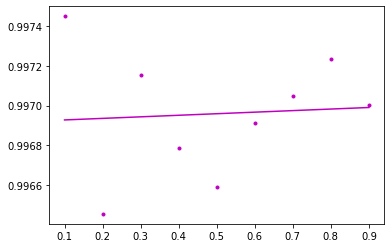

100%|##########| 4999/4999 [00:00<00:00, 29773.87it/s]


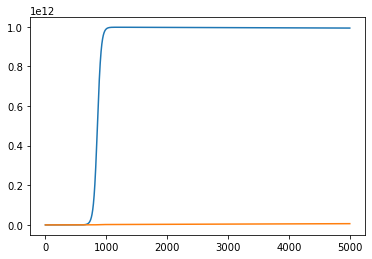

A =  0.9968988911448713
B =  0.9970300168808448
C =  -0.10822192842476497
D =  1.2225669147502627
0.0178150479220488


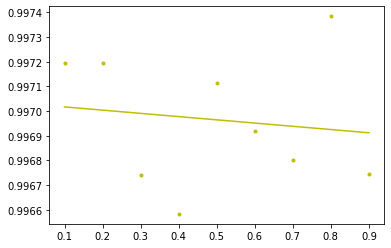



Average R^2 coefficient 0.48804932637995174


In [31]:
# FOR THE CASE b1 < b2: RESISTANT CELLS GROW FASTER THAN PARENT CELLS

u = 3.4e-05
s = 0.4/100
T = 3
years=25
days = int(np.floor(years/4.))*366+(years-int(np.floor(years/4.)))*365
t_tot = int(days/T)
d = lambda j: (1-s)**(j+1)/2
b = lambda j: 1-d(j)

# TO CHANGE BIRTH/DEATH RATES, CHANGE THESE:
b1, d1 = 3.25e-2, 1e-5
b2, d2 = 2.75e-2, 1e-5

nu = b1*u
p1 = 100
dm = d1*u**2
p0_grid = np.arange(0.1, 1, 0.1)

def rhs_cc_no_drug(x, t):
    x1, x2 = x
    rhs1 = b1*(1 - (x1 + x2)/k)*x1 - (d1 + nu)*x1
    rhs2 = b2*(1 - (x1+x2)/k)*x2 + nu*x1 - d2*x2
    return np.array([rhs1,rhs2])

def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))

def get_fitness(p0):
    rest = np.arange(0, 5000, 1)
    solver = RungeKutta4(rhs_cc_no_drug)
    init_cond = np.array([p0, 1-p0])
    solver.set_initial_conditions(init_cond)
    resy, rest = solver.solve(rest)
    N_1, N_2 = resy.T
    
    popt1, _ = curve_fit(sigmoid, range(len(N_1)), N_1)
    popt2, _ = curve_fit(sigmoid, range(len(N_2)), N_2)
    return popt1[1], popt2[1], N_1, N_2

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
sum    = 0
# plot for different carrying capacities
for i in range(len(ccs)): 
    k = ccs[i]
    k1s, k2s = [], []
    for p0 in p0_grid:
        k1, k2, N_1, N_2 = get_fitness(p0)
        k1s.append(k1); k2s.append(k2)
    
    plt.plot(N_1)
    plt.plot(N_2)
    plt.show(); plt.clf()
    fit  = np.polyfit(p0_grid, k1s, 1)
    fit2 = np.polyfit(p0_grid, k2s, 1)
    print('A = ', fit[0]+fit[1])
    print('B = ', fit[1])
    print('C = ', fit2[0] + fit2[1])
    print('D = ', fit2[1])
    plt.plot(p0_grid, k1s, 'k.', color=colors[i])
    plt.plot(p0_grid, fit[0]*p0_grid + fit[1], linestyle='-', color=colors[i])
    sum += r2_score(k1s, fit[0]*p0_grid + fit[1])
    print(r2_score(k1s, fit[0]*p0_grid + fit[1]))

    plt.show()    
print()
print()
print('Average R^2 coefficient', sum / len(ccs))

100%|##########| 4999/4999 [00:00<00:00, 26707.35it/s]


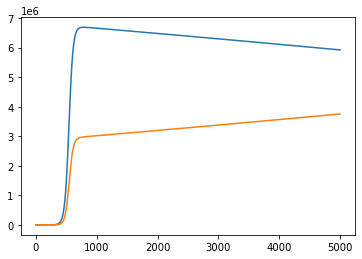

A =  0.034064225175928636
B =  0.042717607166505724
C =  0.02162190869267698
D =  0.033571312902986074


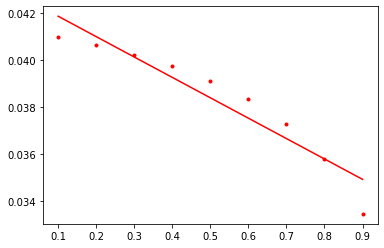

 53%|#####3    | 2670/4999 [00:00<00:00, 26696.78it/s]

R^2 correlation:  0.9033485443220239


100%|##########| 4999/4999 [00:00<00:00, 26549.99it/s]


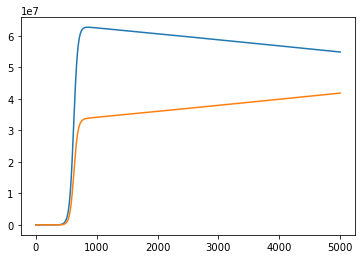

A =  0.03462987609917679
B =  0.04251141995947371
C =  0.022724688692172874
D =  0.033457280542147694


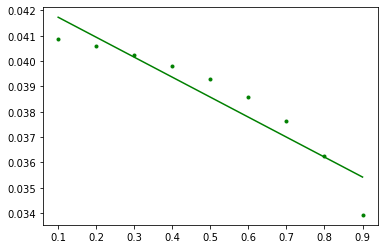

  0%|          | 0/4999 [00:00<?, ?it/s]

R^2 correlation:  0.8853460588529503


100%|##########| 4999/4999 [00:00<00:00, 27694.99it/s]


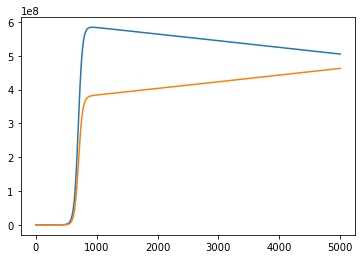

A =  0.03516197712173039
B =  0.04228550779050506
C =  0.02375384410757906
D =  0.033321118414148504


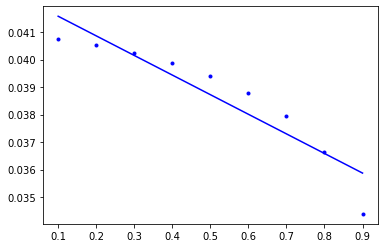

  0%|          | 0/4999 [00:00<?, ?it/s]

R^2 correlation:  0.867865859305353


100%|##########| 4999/4999 [00:00<00:00, 27757.10it/s]


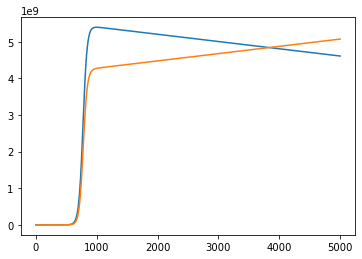

A =  0.03565679013172576
B =  0.04203750686345925
C =  0.02470573939230232
D =  0.03317075118814455


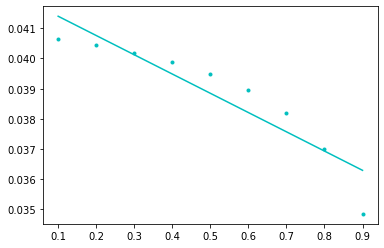

 52%|#####2    | 2608/4999 [00:00<00:00, 26078.47it/s]

R^2 correlation:  0.8506902444128941


100%|##########| 4999/4999 [00:00<00:00, 27419.74it/s]


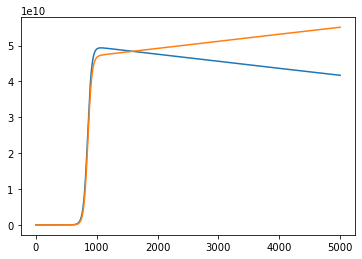

A =  0.996005207824151
B =  -0.2784694121465568
C =  0.9703201853340419
D =  0.8092775150480865


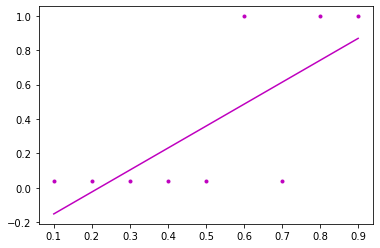

 55%|#####5    | 2770/4999 [00:00<00:00, 27697.25it/s]

R^2 correlation:  0.5321463236027302


100%|##########| 4999/4999 [00:00<00:00, 27556.97it/s]


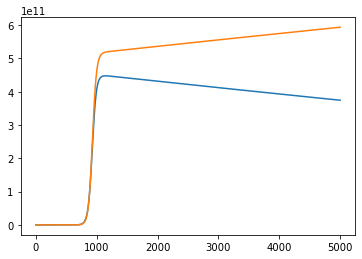

A =  1.342816975571964
B =  0.22620405046855507
C =  0.9965887041942911
D =  0.997266154912813


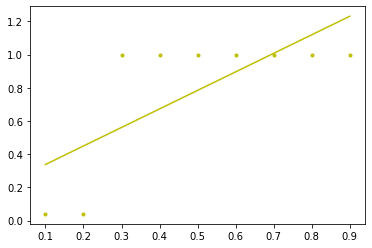

R^2 correlation:  0.5252777817847842
Average R^2 coefficient 0.7607791353801227


In [32]:
# FOR THE CASE b1 < b2: RESISTANT CELLS GROW FASTER THAN PARENT CELLS

u = 3.4e-05
s = 0.4/100
T = 3
years=25
days = int(np.floor(years/4.))*366+(years-int(np.floor(years/4.)))*365
t_tot = int(days/T)
d = lambda j: (1-s)**(j+1)/2
b = lambda j: 1-d(j)

# b1 < b2 
# TO CHANGE BIRTH/DEATH RATES, CHANGE THESE:
b1, d1 = 3e-2, 1e-3
b2, d2 = 3.25e-2, 1e-3

nu = b1*u
p1 = 100
dm = d1*u**2
p0_grid = np.arange(0.1, 1, 0.1)

def rhs_cc_no_drug(x, t):
    x1, x2 = x
    rhs1 = b1*(1 - (x1 + x2)/k)*x1 - (d1 + nu)*x1
    rhs2 = b2*(1 - (x1+x2)/k)*x2 + nu*x1 - d2*x2
    return np.array([rhs1,rhs2])

def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))

def get_fitness(p0):
    rest = np.arange(0, 5000, 1)
    solver = RungeKutta4(rhs_cc_no_drug)
    init_cond = np.array([p0, 1-p0])
    solver.set_initial_conditions(init_cond)
    resy, rest = solver.solve(rest)
    N_1, N_2 = resy.T
    
    popt1, _ = curve_fit(sigmoid, range(len(N_1)), N_1)
    popt2, _ = curve_fit(sigmoid, range(len(N_2)), N_2)
    return popt1[1], popt2[1], N_1, N_2

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
sum    = 0
# plot for different carrying capacities
for i in range(len(ccs)): 
    k = ccs[i]
    k1s, k2s = [], []
    for p0 in p0_grid:
        k1, k2, N_1, N_2 = get_fitness(p0)
        k1s.append(k1); k2s.append(k2)
    
    plt.plot(N_1)
    plt.plot(N_2)
    plt.show(); plt.clf();
    fit  = np.polyfit(p0_grid, k1s, 1)
    fit2 = np.polyfit(p0_grid, k2s, 1)
    print('A = ', fit[0]+fit[1])
    print('B = ', fit[1])
    print('C = ', fit2[0] + fit2[1])
    print('D = ', fit2[1])
    plt.plot(p0_grid, k1s, 'k.', color=colors[i])
    plt.plot(p0_grid, fit[0]*p0_grid + fit[1], linestyle='-', color=colors[i])
    plt.show()
    sum += r2_score(k1s, fit[0]*p0_grid + fit[1])
    print('R^2 correlation: ', r2_score(k1s, fit[0]*p0_grid + fit[1]))


print('Average R^2 coefficient', sum / len(ccs))


100%|##########| 4999/4999 [00:00<00:00, 17691.39it/s]


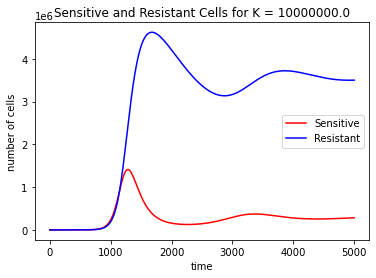

A =  0.03728376988856448
B =  0.03719278885995516
C =  0.0162098346407634
D =  0.01615376472204187
C - A =  0.05331164247210924
D - B =  -0.021039024137913292


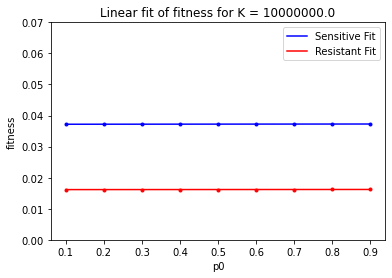

100%|##########| 4999/4999 [00:00<00:00, 17757.86it/s]


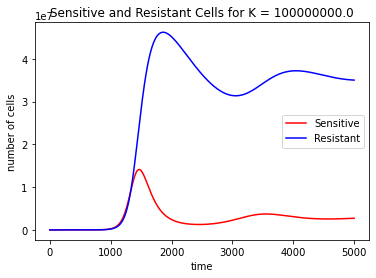

A =  0.03720506992594464
B =  0.0371186662173427
C =  0.01615855686141459
D =  0.016098860856180123
C - A =  0.05319081937015535
D - B =  -0.021019805361162578


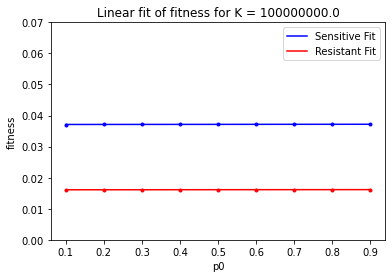

100%|##########| 4999/4999 [00:00<00:00, 15428.97it/s]


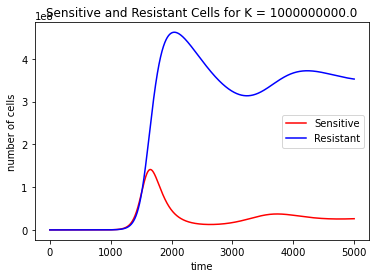

A =  0.03712201318176902
B =  0.03699076181898441
C =  0.01610382419515321
D =  0.016050723849472218
C - A =  0.052963334651353014
D - B =  -0.020940037969512194


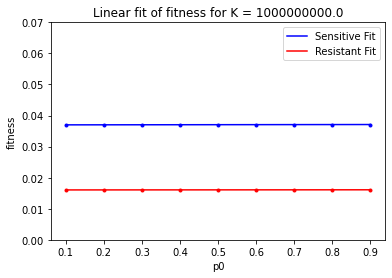

100%|##########| 4999/4999 [00:00<00:00, 16522.88it/s]


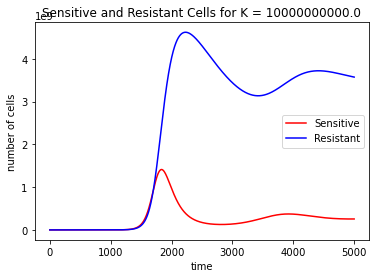

A =  0.03702672397651442
B =  0.03688258184739938
C =  0.016052691835339597
D =  0.016011365475818967
C - A =  0.05279113155362393
D - B =  -0.02087121637158041


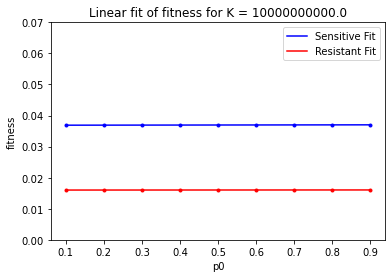

100%|##########| 4999/4999 [00:00<00:00, 15971.33it/s]


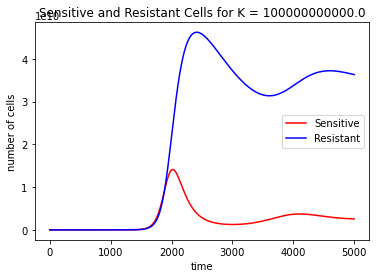

A =  0.036923461991790286
B =  0.03676054133367641
C =  1.1332721085015116
D =  0.6428016185346231
C - A =  1.169869729177074
D - B =  0.6060410772009467


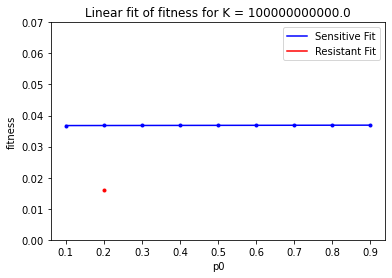

100%|##########| 4999/4999 [00:00<00:00, 16312.71it/s]


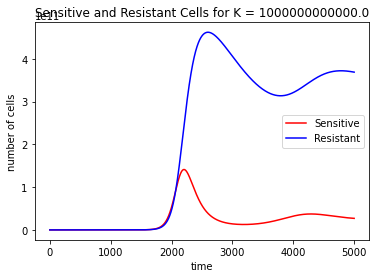

A =  0.9972104751632671
B =  0.9971283587961594
C =  0.5065840010714662
D =  0.8334818448426522
C - A =  1.5036302435005178
D - B =  -0.16364651395350716


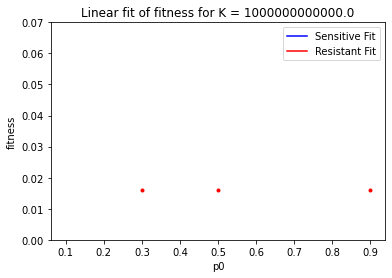

In [12]:
u = 3.4e-05
s = 0.4/100
T = 3
years=30
days = int(np.floor(years/4.))*366+(years-int(np.floor(years/4.)))*365
t_tot = int(days/T)
d = lambda j: (1-s)**(j+1)/2
b = lambda j: 1-d(j)

b1, d1 = 3.25e-2, 1e-3
b2, d2 = 3.25e-4, 1e-3
nu = b1*u
p1 = 100
dm = d1*u**2
p0_grid = np.arange(0.1, 1, 0.1)
alpha = 0.001

def rhs_cc_no_drug(x, t):
    x1, x2 = x
    rhs1 = b1*(1 - (x1 + x2)/k)*x1 - (d1*u(t) + nu + alpha*u(t))*x1
    rhs2 = b2*(1 - (x1+x2)/k)*x2 + (nu + alpha*u(t))*x1 - d2*x2
    return np.array([rhs1,rhs2])

def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))

def u(t):
    return 10 / (1 + np.exp(5 - t))

def get_fitness(p0):
    rest = np.arange(0, 5000, 1)
    solver = RungeKutta4(rhs_cc_no_drug)
    init_cond = np.array([p0, 1-p0])
    solver.set_initial_conditions(init_cond)
    resy, rest = solver.solve(rest)
    N_1, N_2 = resy.T
    
    popt1, _ = curve_fit(sigmoid, range(len(N_1)), N_1)
    popt2, _ = curve_fit(sigmoid, range(len(N_2)), N_2)
    return popt1[1], popt2[1], N_1, N_2

colors = ['b', 'r', 'orange', 'y', 'g', 'indigo', 'purple']
# ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
ccs    = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12])
sum    = 0
# plot for different carrying capacities
for i in range(len(ccs)): 
    k = ccs[i]
    k1s, k2s = [], []
    for p0 in p0_grid:
        k1, k2, N_1, N_2 = get_fitness(p0)
        k1s.append(k1); k2s.append(k2)

    plt.xlabel('time')
    plt.ylabel('number of cells')
    plt.title(f'Sensitive and Resistant Cells for K = {ccs[i]}')
    plt.plot(N_1, label='Sensitive', color='red')
    plt.plot(N_2, label='Resistant', color='blue')
    plt.legend(loc='center right')
    plt.show(); plt.clf()
    fit  = np.polyfit(p0_grid, k1s, 1)
    fit2 = np.polyfit(p0_grid, k2s, 1)
    print('A = ', fit[0]+fit[1])
    print('B = ', fit[1])
    print('C = ', fit2[0] + fit2[1])
    print('D = ', fit2[1])
    
    print('C - A = ', fit2[0] + fit2[1] - fit[0]+fit[1])
    print('D - B = ', fit2[1] - fit[1])
    
    plt.plot(p0_grid, k1s, 'k.', color='blue')
    plt.plot(p0_grid, k2s, 'k.', color='red')
    plt.plot(p0_grid, fit[0]*p0_grid + fit[1], linestyle='-', color='blue', label='Sensitive Fit')
    plt.plot(p0_grid, fit2[0]*p0_grid + fit2[1], linestyle='-', color='red', label='Resistant Fit')
    plt.legend(loc='upper right')
    plt.xlabel('p0')
    plt.ylabel('fitness')
    plt.title(f'Linear fit of fitness for K = {ccs[i]}')
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((x1,x2,0, 0.07))
    plt.show()    
    # sum += r2_score(k1s, fit[0]*p0_grid + fit[1])
    # print("R^2 correlation", r2_score(k1s, fit[0]*p0_grid + fit[1]))
